In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#paramaters
#units are expressed in Newton, meters, and seconds
#results are then converted to match the units used in the plot
pars = {}
pars['a00'] = - 21*10**-6
pars['a01'] = 1
pars['a10'] = - 1.348*10**-3
pars['a11'] = -1
pars['gamma0'] = 8.72*10**-6
pars['gamma1'] = 54.8*10**-3

pars['kbT'] = 4.1*10**-21
pars['noise0'] = np.sqrt(2*pars['gamma0']*pars['kbT'])
pars['noise1'] = np.sqrt((4.916)*(1e-24))

In [3]:
def analytical_soln_acf_generic(omega_list, pars):

    autocorr_list = []
    for omega in omega_list:
        numerator = ( pars['a11']**2 * pars['noise0']**2 ) \
        + ( pars['a01']**2 * pars['noise1']**2 ) \
        + ( (omega**2) * (pars['gamma1']**2) * (pars['noise0']**2) )

        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        autocorr = numerator/denominator
        autocorr_list.append(autocorr)
    return autocorr_list

In [4]:
def analytical_soln_real_response(omega_list, pars):
    real_response_list = []
    for omega in omega_list:
        numerator = - (omega**2)*(pars['gamma1']**2)*pars['a00'] \
        - (pars['a11']**2)*pars['a00'] \
        + pars['a10']*pars['a01']*pars['a11']
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )
        
        real_response = numerator/denominator
        real_response_list.append(real_response)
    return real_response_list

In [5]:
def analytical_soln_imaginary_response(omega_list, pars):
    im_response_list = []
    for omega in omega_list:
        numerator = omega*(
            (pars['gamma1']*pars['a10']*pars['a01']) \
            + (pars['gamma0']*(pars['gamma1']**2)*(omega**2)) \
            + ((pars['a11']**2)*pars['gamma0'])
        )
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        
        im_response = numerator/denominator
        im_response_list.append(im_response)
    return im_response_list

### Non reciprocal coupling

#### PSD

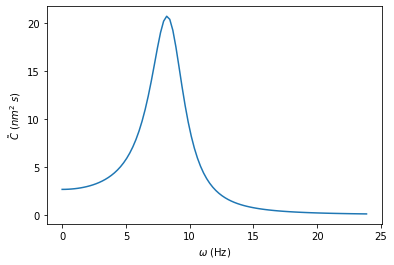

In [6]:
omega_list = np.linspace(0, 150, 100)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln)*(1e18))
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$\~{C}$ ($nm^2$ $s$)')
plt.show()

In [7]:
#positive determinant for a stable steady state to exist
(pars['a00']*pars['a11']) - (pars['a01']*pars['a10'])

0.001369

Inverse Fourier Transform

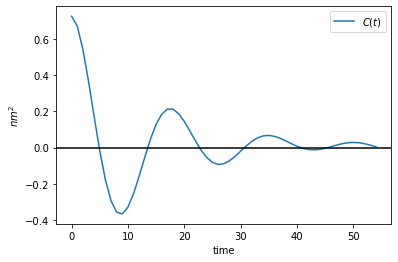

In [8]:
omega_new_list = np.linspace(1, 900, 100)
paper_soln_logspace = analytical_soln_acf_generic(omega_new_list, pars)
inverse_fourier = np.fft.ifft(np.array(paper_soln_logspace)*(1e18))
plt.plot(inverse_fourier.real[:55], label='$C(t)$')
plt.axhline(0, color='black')
plt.legend()
plt.xlabel('time')
plt.ylabel('$nm^2$')

plt.show()

what should be the unit of time?

Log-Log Plot

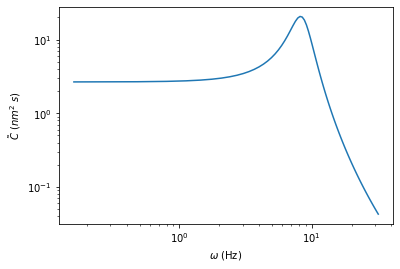

In [9]:
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(1, 200, 100)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln)*(1e18))
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$\~{C}$ ($nm^2$ $s$)')
plt.show()

#### Response function

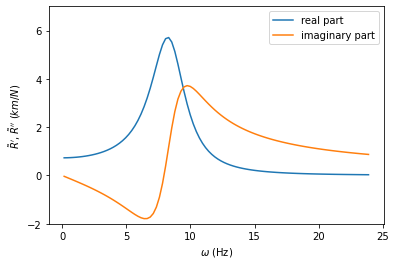

In [10]:
omega_list = np.linspace(1, 150, 100)
paper_real_soln = analytical_soln_real_response(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(paper_real_soln)/(1e3), label="real part")
plt.plot(omega_list/(2*np.pi), np.array(paper_imaginary_soln)/(1e3), label='imaginary part')
plt.xlabel('$\omega$ (Hz)')
plt.ylabel("$\~{R}'$, $\~{R}''$ ($km/N$)")
plt.ylim(-2, 7)
plt.yticks([-2,0, 2,4,6])
plt.legend()
plt.show()

Log-Log Plot

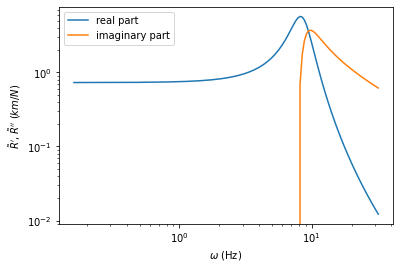

In [11]:
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(1, 200, 100)
paper_real_soln = analytical_soln_real_response(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(paper_real_soln)/(1e3), label="real part")
plt.plot(omega_list/(2*np.pi), np.array(paper_imaginary_soln)/(1e3), label='imaginary part')
plt.xlabel('$\omega$ (Hz)')
plt.ylabel("$\~{R}'$, $\~{R}''$ ($km/N$)")
plt.legend()
plt.show()

#### Plot PSD and (2kbT/omega)R"

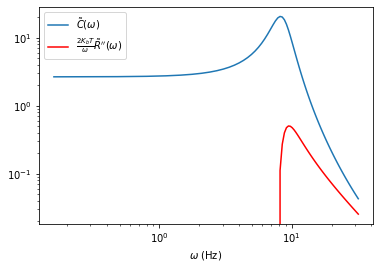

In [21]:
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(1, 200, 100)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary = (np.array(2*pars['kbT'])*np.array(paper_imaginary_soln))/omega_list

plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln)*(1e18),  label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary)*(1e18), color='red', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
plt.xlabel('$\omega$ (Hz)')
plt.legend()
plt.show()

zooming in

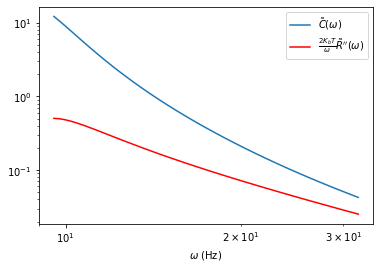

In [13]:
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(60, 200, 100)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary = (np.array(2*pars['kbT'])*np.array(paper_imaginary_soln))/omega_list

plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln)*(1e18), label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary)*(1e18), color='red', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
plt.xlabel('$\omega$ (Hz)')
plt.legend()
plt.show()

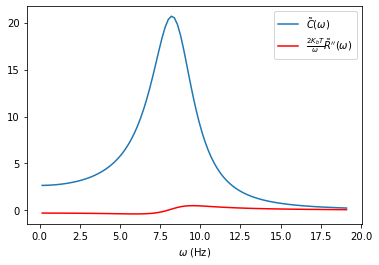

In [14]:
omega_list = np.linspace(1, 120, 100)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary = (np.array(2*pars['kbT'])*np.array(paper_imaginary_soln))/omega_list

plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln)*(1e18),  label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary)*(1e18), color='red', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
plt.xlabel('$\omega$ (Hz)')
plt.legend()
plt.show()

In [15]:
delta_omega = omega_list[1]/(2*np.pi) - omega_list[0]/(2*np.pi)
omega_squared = (omega_list/(2*np.pi))**2

#paper_acf_soln is autocrrelation function
#final_imaginary is imaginary of response function * (2*kBT/omega)
violation_function = (pars['gamma0']/np.pi)*(omega_squared*paper_acf_soln - omega_squared*final_imaginary)
#energy dissipated is the integral of the violation_function
energy_diss = np.sum(violation_function*delta_omega)

In [16]:
energy_diss

1.8010511136545402e-20

### No coupling

#### PSD

In [24]:
pars['a01'] = 0
pars['a10'] = 0

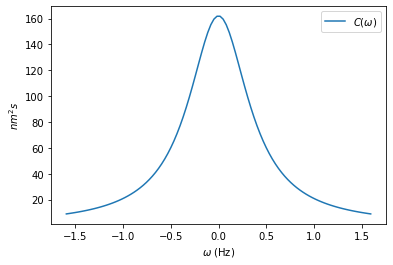

In [25]:
omega_list = np.linspace(-10, 10, 100)
nocoupling_acf_soln = analytical_soln_acf_generic(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(nocoupling_acf_soln)*(1e18),  label='$C(\omega)$')
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$nm^2 s$')
plt.legend()
plt.show()

Inverse Fourier Transform

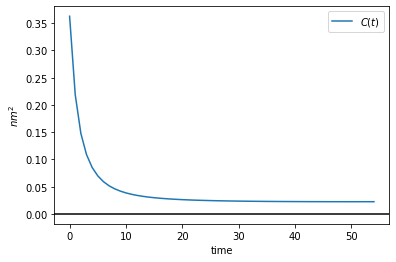

In [26]:
omega_new_list = np.linspace(15, 180, 100)
nocoupling_soln_logspace = analytical_soln_acf_generic(omega_new_list, pars)
inverse_fourier_nocoupling = np.fft.ifft(np.array(nocoupling_soln_logspace)*(1e18))
plt.plot(inverse_fourier_nocoupling.real[:55], label='$C(t)$')
plt.axhline(0, color='black')
plt.legend()
plt.xlabel('time')
plt.ylabel('$nm^2$')

plt.show()

unit of time?

Log-log plot

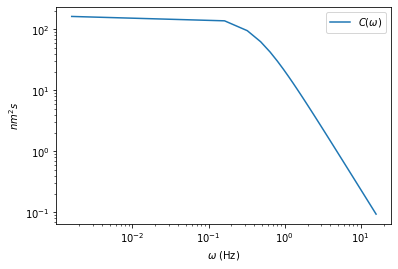

In [27]:
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(0.01, 100, 100)
nocoupling_acf_soln = analytical_soln_acf_generic(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(nocoupling_acf_soln)*(1e18),  label='$C(\omega)$')
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$nm^2 s$')
plt.legend()
plt.show()

#### Response function

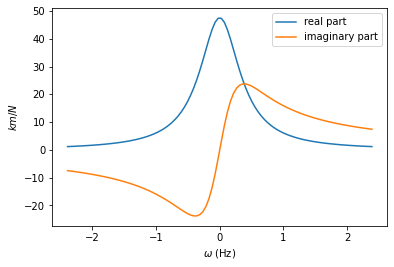

In [28]:
omega_list = np.linspace(-15, 15, 100)
nocoupling_real_soln = analytical_soln_real_response(omega_list, pars)
nocoupling_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(nocoupling_real_soln)/(1e3), label="real part")
plt.plot(omega_list/(2*np.pi), np.array(nocoupling_imaginary_soln)/(1e3), label='imaginary part')
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$km/N$')
plt.legend()
plt.show()

Log-log plot

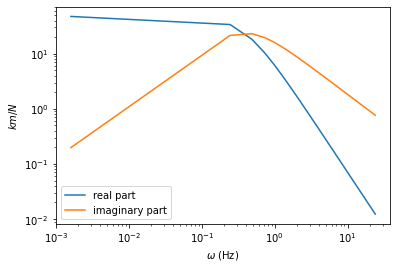

In [29]:
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(0.01, 150, 100)
nocoupling_real_soln = analytical_soln_real_response(omega_list, pars)
nocoupling_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(nocoupling_real_soln)/(1e3), label="real part")
plt.plot(omega_list/(2*np.pi), np.array(nocoupling_imaginary_soln)/(1e3), label='imaginary part')
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$km/N$')
plt.legend()
plt.show()

#### Plot PSD and (2kbT/omega)R"

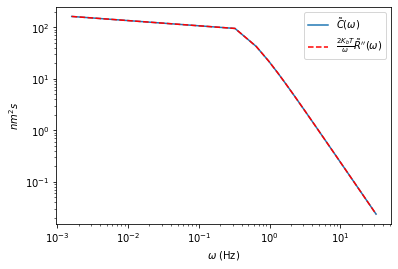

In [30]:
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(0.01, 200, 100)
nocoupling_acf_soln = analytical_soln_acf_generic(omega_list, pars)
nocoupling_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary_nocoupling = (np.array(2*pars['kbT'])*np.array(nocoupling_imaginary_soln))/omega_list

plt.plot(omega_list/(2*np.pi), np.array(nocoupling_acf_soln)*(1e18),  label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary_nocoupling)*(1e18), ls='dashed', color='red', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$nm^2 s$')
plt.legend()
plt.show()

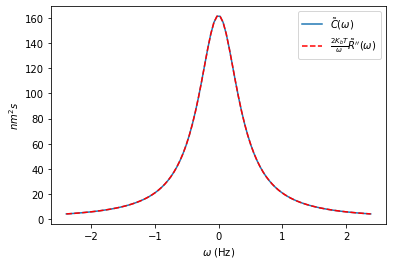

In [31]:
omega_list = np.linspace(-15, 15, 100)
nocoupling_acf_soln = analytical_soln_acf_generic(omega_list, pars)
nocoupling_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary_nocoupling = (np.array(2*pars['kbT'])*np.array(nocoupling_imaginary_soln))/omega_list

plt.plot(omega_list/(2*np.pi), np.array(nocoupling_acf_soln)*(1e18),  label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary_nocoupling)*(1e18), ls = 'dashed', color='red', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('$nm^2 s$')
plt.legend()
plt.show()

In [32]:
delta_omega = omega_list[1]/(2*np.pi) - omega_list[0]/(2*np.pi)
omega_squared = (omega_list/(2*np.pi))**2
violation_function_nocoupling = (pars['gamma0']/np.pi)*(omega_squared*nocoupling_acf_soln - omega_squared*final_imaginary_nocoupling)
heat_nocoupling = np.sum(violation_function_nocoupling*delta_omega)

In [33]:
heat_nocoupling

4.154737591921193e-38

In [35]:
violation_function_nocoupling.sum()

8.61464544360615e-37

In [38]:
len(np.arange(1,50000, 50))

1000